# Prototype code to rank n students who rank k students each

## Author: Michel Tsamados, etc
## Date: 20.06.21

### Variables:

n = total number of students in class

k = number of students each student ranks

There many beautiful and elegant comparison algorithms https://en.wikipedia.org/wiki/Sorting_algorithm#Comparison_of_algorithms and our goal is not to be optimal in our implementation but rather to server as well as we can both the educators and students in providing a faster but more rigorous assessment. Below we illustrate our approach with the following algorithms 

1) Ranking based on Elo algorithm https://en.wikipedia.org/wiki/Elo_rating_system

2) Ranking based on Quicksort algorithm 

# 1) Elo approach 

In [269]:
#https://github.com/rshk/elo
from elo import elo, expected
# from __future__ import division


def expected(A, B):
    """
    Calculate expected score of A in a match against B

    :param A: Elo rating for player A
    :param B: Elo rating for player B
    """
    return 1 / (1 + 10 ** ((B - A) / 400))


def elo(old, exp, score, kappa=32):
    """
    Calculate the new Elo rating for a player

    :param old: The previous Elo rating
    :param exp: The expected score for this match
    :param score: The actual score for this match
    :param k: The k-factor for Elo (default: 32)
    """
    return old + kappa * (score - exp)


# def test_expected():
#     assert round(expected(1613, 1609), 3) == 0.506
#     assert round(expected(1613, 1477), 3) == 0.686
#     assert round(expected(1613, 1388), 3) == 0.785
#     assert round(expected(1613, 1586), 3) == 0.539
#     assert round(expected(1613, 1720), 3) == 0.351

#     pairs = [
#         (0, 0),
#         (1, 1),
#         (10, 20),
#         (123, 456),
#         (2400, 2500),
#     ]

#     for a, b in pairs:
#         assert round(expected(a, b) + expected(b, a), 3) == 1.0


# def test_elo():
#     exp = 0
#     exp += expected(1613, 1609)
#     exp += expected(1613, 1477)
#     exp += expected(1613, 1388)
#     exp += expected(1613, 1586)
#     exp += expected(1613, 1720)
#     score = (0 + 0.5 + 1 + 1 + 0)

#     assert round(elo(1613, exp, score, k=32)) == 1601
#     assert round(elo(1613, exp, 3, k=32)) == 1617



In [265]:
exp=0
exp += expected(1613, 1009)
exp
#player wins almost every time (97% of the time)

0.9700234108404839

In [266]:
# from elo import elo
# elo(1613, 2.867, 3.5, k=32)  # 1601

In [272]:
# from random import seed
import numpy as np 
import matplotlib.pyplot as plt

from random import random
print(random(), random(), random())

0.009843197911773682 0.9055350889559461 0.45277045993249365


In [329]:
def argsort(seq):

    #return sorted(range(len(seq)), key = seq.__getitem__)

    #return [i for (v, i) in sorted((v, i) for (i, v) in enumerate(seq))]

    return [x for x,y in sorted(enumerate(seq), key = lambda x: x[1])] 

In [280]:
def synthetic_assessment(n=20,k=5,elo_default=1500.,elo_min=1000., elo_max=2000., kappa=32):

    # Initialise number of copies/students to rank (n) and the size of the student assessment pool (k)
    # Each of n students ranks k assessments (in order 1,2....k-1,k)
    # The Elo algorithm allows for equal rankings but we suggest to avoid this as students tend to be too 'nice' otherwise
    # n=20
    # k=5

    # Initialise the synthetic distribution of elo scores 
    elo_true=[]
    elo_predict=[]

    for i in range(n):
    # no prior information on the level of each student -> all assessment have an equal Elo prior score of 1500
        elo_predict.append(elo_default)

    # we synthesie a distribution of  assessment 
    # regularly spaced assessments with 
        elo_min = elo_min #minimum Elo value
        elo_max = elo_max #minimum Elo value
        elo_range = elo_max - elo_min

    #     elo_true.append(1000+1000*random())
        elo_true.append(elo_min+elo_range*i/n)

    # randomly distributed assessments
    #     elo_true.append(elo_min+elo_range*random())



    # Loop over students' peer feedback 
    wins=np.zeros((n))
    games=np.zeros((n))

    #1: no prior information 
    #2: two step assessment 
    #3: prior knowledge (i.e. ask the students for their self estimated ranking)
    case = 1 

    for i in range(n):
        for l in range(k):
            j=int(random()*n) #select list of students to assess for assessor i at random 
#             print(i,j,elo_true[i],elo_true[j])
            exp  = expected(elo_true[i], elo_true[j])
            games[i]=games[i]+1
            games[j]=games[j]+1
            if random()>exp: #here can add error
#                 print('i loses ',exp )
                wins[j]=wins[j]+1
            else:
#                 print('i wins ',exp)
                wins[i]=wins[i]+1

    #     elo_predict[i]=elo(elo_true[i],wins[i]*1.,games[i]*0.5, k=32)
        elo_predict[i]=elo(elo_default,games[i]*0.5,wins[i], kappa=kappa) #kappa = K-factor in Elo algorithm 
    return(elo_predict,elo_true)

In [276]:
elo_predict, elo_true = synthetic_assessment(n=20,k=5,elo_default=1500.,elo_min=1000., elo_max=2000., kappa=32)


0 3 1000.0 1150.0
i loses  0.29661499652817136
0 17 1000.0 1850.0
i loses  0.007443126518568525
0 5 1000.0 1250.0
i loses  0.19168232745054142
0 1 1000.0 1050.0
i wins  0.4285368825916186
0 17 1000.0 1850.0
i loses  0.007443126518568525
1 5 1050.0 1250.0
i loses  0.2402530733520421
1 4 1050.0 1200.0
i wins  0.29661499652817136
1 19 1050.0 1950.0
i loses  0.005591967308834779
1 15 1050.0 1750.0
i loses  0.017472091494833444
1 9 1050.0 1450.0
i loses  0.09090909090909091
2 9 1100.0 1450.0
i loses  0.11766170295305857
2 8 1100.0 1400.0
i loses  0.15097955721132328
2 17 1100.0 1850.0
i loses  0.0131597265477055
2 19 1100.0 1950.0
i loses  0.007443126518568525
2 3 1100.0 1150.0
i loses  0.4285368825916186
3 14 1150.0 1700.0
i loses  0.04046332603236435
3 1 1150.0 1050.0
i wins  0.6400649998028851
3 14 1150.0 1700.0
i loses  0.04046332603236435
3 2 1150.0 1100.0
i wins  0.5714631174083814
3 9 1150.0 1450.0
i loses  0.15097955721132328
4 0 1200.0 1000.0
i loses  0.7597469266479578
4 2 1200.0 

In [277]:
print(argsort(elo_true))
print(argsort(elo_predict))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[4, 2, 1, 0, 6, 7, 3, 5, 8, 16, 9, 10, 12, 13, 15, 11, 17, 19, 18, 14]


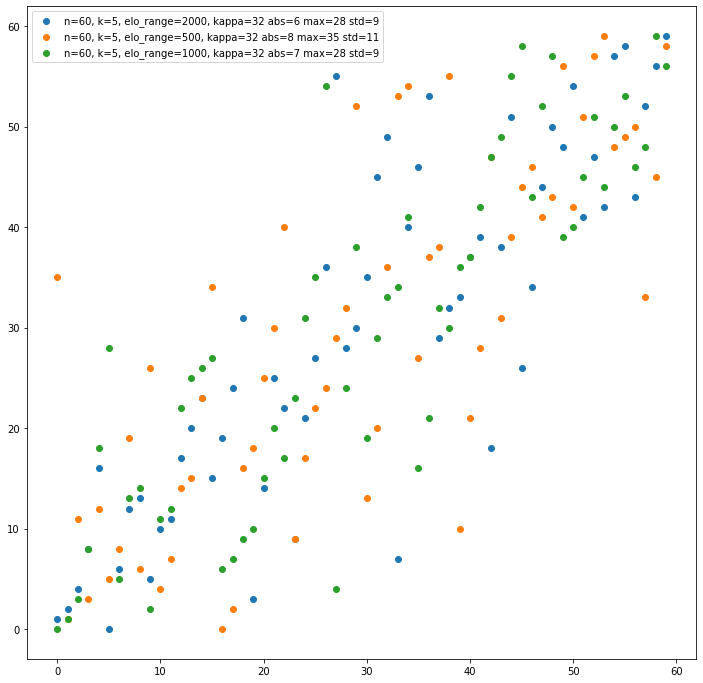

In [326]:
plt.figure(figsize=(12,12))
# elo_predict, elo_true = synthetic_assessment(n=20,k=5,elo_default=1500.,elo_min=1000., elo_max=2000., kappa=32)
# plt.scatter(argsort(elo_true),argsort(elo_predict),label='n=20, k=5, elo_range=1000, kappa=32')
# elo_predict, elo_true = synthetic_assessment(n=60,k=5,elo_default=1500.,elo_min=1000., elo_max=2000., kappa=32)
# plt.scatter(argsort(elo_true),argsort(elo_predict),label='n=60, k=5, elo_range=1000, kappa=32')
# elo_predict, elo_true = synthetic_assessment(n=60,k=5,elo_default=1500.,elo_min=1000., elo_max=2000., kappa=32)
# a=(np.mean(np.asarray(argsort(elo_true))-np.asarray(argsort(elo_predict))))
# b=(np.mean(np.abs(np.asarray(argsort(elo_true))-np.asarray(argsort(elo_predict)))))
# c=(np.max(np.abs(np.asarray(argsort(elo_true))-np.asarray(argsort(elo_predict)))))
# d=(np.std(np.asarray(argsort(elo_true))-np.asarray(argsort(elo_predict))))
# plt.scatter(argsort(elo_true),argsort(elo_predict),label='n=60, k=5, elo_range=1000, kappa=32'+' abs='+str(int(b))+' max='+str(c)+' std='+str(int(d)))

# elo_predict, elo_true = synthetic_assessment(n=60,k=5,elo_default=1500.,elo_min=1000., elo_max=2000., kappa=32)
# a=(np.mean(np.asarray(argsort(elo_true))-np.asarray(argsort(elo_predict))))
# b=(np.mean(np.abs(np.asarray(argsort(elo_true))-np.asarray(argsort(elo_predict)))))
# c=(np.max(np.abs(np.asarray(argsort(elo_true))-np.asarray(argsort(elo_predict)))))
# d=(np.std(np.asarray(argsort(elo_true))-np.asarray(argsort(elo_predict))))
# plt.scatter(argsort(elo_true),argsort(elo_predict),label='n=60, k=5, elo_range=1000, kappa=12'+' abs='+str(int(b))+' max='+str(c)+' std='+str(int(d)))



# elo_predict, elo_true = synthetic_assessment(n=60,k=10,elo_default=1500.,elo_min=1000., elo_max=2000., kappa=32)
# a=(np.mean(np.asarray(argsort(elo_true))-np.asarray(argsort(elo_predict))))
# b=(np.mean(np.abs(np.asarray(argsort(elo_true))-np.asarray(argsort(elo_predict)))))
# c=(np.max(np.abs(np.asarray(argsort(elo_true))-np.asarray(argsort(elo_predict)))))
# d=(np.std(np.asarray(argsort(elo_true))-np.asarray(argsort(elo_predict))))
# plt.scatter(argsort(elo_true),argsort(elo_predict),label='n=60, k=10, elo_range=1000, kappa=32'+' abs='+str(int(b))+' max='+str(c)+' std='+str(int(d)))



elo_predict, elo_true = synthetic_assessment(n=60,k=5,elo_default=1500.,elo_min=500., elo_max=2500., kappa=32)
a=(np.mean(np.asarray(argsort(elo_true))-np.asarray(argsort(elo_predict))))
b=(np.mean(np.abs(np.asarray(argsort(elo_true))-np.asarray(argsort(elo_predict)))))
c=(np.max(np.abs(np.asarray(argsort(elo_true))-np.asarray(argsort(elo_predict)))))
d=(np.std(np.asarray(argsort(elo_true))-np.asarray(argsort(elo_predict))))
plt.scatter(argsort(elo_true),argsort(elo_predict),label='n=60, k=5, elo_range=2000, kappa=32'+' abs='+str(int(b))+' max='+str(c)+' std='+str(int(d)))


elo_predict, elo_true = synthetic_assessment(n=60,k=5,elo_default=1500.,elo_min=1250., elo_max=1750., kappa=32)
a=(np.mean(np.asarray(argsort(elo_true))-np.asarray(argsort(elo_predict))))
b=(np.mean(np.abs(np.asarray(argsort(elo_true))-np.asarray(argsort(elo_predict)))))
c=(np.max(np.abs(np.asarray(argsort(elo_true))-np.asarray(argsort(elo_predict)))))
d=(np.std(np.asarray(argsort(elo_true))-np.asarray(argsort(elo_predict))))
plt.scatter(argsort(elo_true),argsort(elo_predict),label='n=60, k=5, elo_range=500, kappa=32'+' abs='+str(int(b))+' max='+str(c)+' std='+str(int(d)))



elo_predict, elo_true = synthetic_assessment(n=60,k=5,elo_default=1500.,elo_min=1000., elo_max=2000., kappa=32)
a=(np.mean(np.asarray(argsort(elo_true))-np.asarray(argsort(elo_predict))))
b=(np.mean(np.abs(np.asarray(argsort(elo_true))-np.asarray(argsort(elo_predict)))))
c=(np.max(np.abs(np.asarray(argsort(elo_true))-np.asarray(argsort(elo_predict)))))
d=(np.std(np.asarray(argsort(elo_true))-np.asarray(argsort(elo_predict))))
plt.scatter(argsort(elo_true),argsort(elo_predict),label='n=60, k=5, elo_range=1000, kappa=32'+' abs='+str(int(b))+' max='+str(c)+' std='+str(int(d)))






plt.legend()

# 2) Quicksort approach

In [330]:
! pwd

/Users/micheltsamados/Google Drive/Teaching_Michel/Outreach/Elo/elo-master-simple
